In [72]:
import numpy as np 
import pandas as pd 
import pandas_datareader as web
import matplotlib.pyplot as plt 


In [2]:
df=web.DataReader('MSFT','yahoo')

In [7]:
df.reset_index(inplace=True)

In [16]:
new_data=df[['Date','Close']]

In [17]:
new_data

,Date,Close
0,2016-05-17,50.509998
1,2016-05-18,50.810001
2,2016-05-19,50.320000
3,2016-05-20,50.619999
4,2016-05-23,50.029999
...,...,...
1254,2021-05-11,246.229996
1255,2021-05-12,239.000000
1256,2021-05-13,243.029999
1257,2021-05-14,248.149994


In [19]:
new_data.index=new_data['Date']

In [22]:
new_data.drop('Date',axis=1,inplace=True)

C:\Users\CHAD\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
new_data

,Close
Date,
2016-05-17,50.509998
2016-05-18,50.810001
2016-05-19,50.320000
2016-05-20,50.619999
2016-05-23,50.029999
...,...
2021-05-11,246.229996
2021-05-12,239.000000
2021-05-13,243.029999


In [24]:
dataset=new_data.values

In [8]:
df[df['Date']=='2020-05-11']

,Date,High,Low,Open,Close,Volume,Adj Close
1002,2020-05-11,187.509995,182.850006,183.149994,186.740005,30892700.0,184.861435


In [25]:
train=new_data[:1002]
valid=new_data[1002:]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
len(train)

1002

In [40]:
x_train,y_train=[],[]
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [47]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) #RESHAPING TO 3-DIMENSIONS

In [55]:
#Modelling

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [57]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [59]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [60]:
model.fit(x_train,y_train,epochs=1,batch_size=1,verbose=2)

942/942 - 28s - loss: 0.0015


In [61]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [68]:
x_test=[]
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])

In [69]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [70]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

<ipython-input-74-f6e2efe5df3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price
No handles with labels found to put in legend.


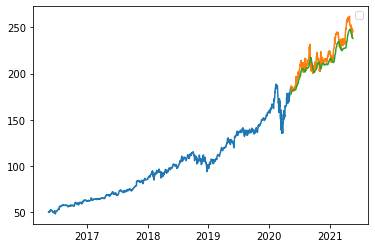

In [74]:
#for plotting
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])